In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib as plt
from matplotlib.ticker import PercentFormatter
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

df = pd.read_csv('nobel.csv')

## Q1

In [2]:
def answer_one():
    return df.head(2)

In [3]:
answer_one()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


## Q2

In [4]:
def answer_two():
    return df['sex'].value_counts().idxmax(), df['birth_country'].value_counts().idxmax()

In [5]:
answer_two()

('Male', 'United States of America')

## Q3

In [6]:
def answer_three():
    df['usa_winner'] = df['birth_country'] == 'United States of America'
    df['decade'] = df['year'].apply(lambda year: year - (year % 10))
    
    usa_prop_per_decade = df['usa_winner'].groupby(df['decade']).mean()
    usa_prop_per_decade = usa_prop_per_decade.to_frame('proportion')
    usa_prop_per_decade['decade'] = usa_prop_per_decade.index
    usa_prop_per_decade.reset_index(drop=True, inplace=True)

    return df['usa_winner'].mean(), usa_prop_per_decade.loc[usa_prop_per_decade['proportion'] > 0.10, 'decade'].iloc[0]

In [7]:
answer_three()

(0.2843029637760702, 1930)

## Q4

In [8]:
def answer_four():
    sns.lineplot(x='decade', y='usa_winner', data=df).yaxis.set_major_formatter(PercentFormatter())

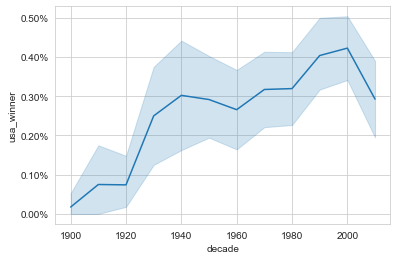

In [9]:
answer_four()

## Q5

In [10]:
def answer_five():
    df['female_winner'] = df['sex'] == 'Female'
    female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
    sns.lineplot(x='decade', y='female_winner', hue='category', data=female_winners)
    return female_winners['category'].value_counts()

Chemistry     12
Literature    12
Medicine      12
Peace         12
Physics       12
Economics      6
Name: category, dtype: int64

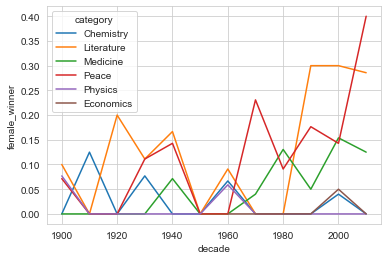

In [11]:
answer_five()

## Q6

In [12]:
def answer_six():
    return df[df['sex'] == 'Female'].sort_values('year').iloc[0].full_name

In [13]:
answer_six()

'Marie Curie, née Sklodowska'

## Q7

In [14]:
def answer_seven():
    lucky_winners = (df[df.duplicated(['full_name'])])
    lucky_winners.drop_duplicates(subset = ["full_name"], inplace=True)
    return lucky_winners
    
#     lucky_winners = df['full_name'].value_counts()
#     return (lucky_winners[lucky_winners > 1])

In [15]:
answer_seven()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_winner,decade,female_winner
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1970,False
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1980,False
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1980,False


## Q11

In [16]:
def answer_eleven():
    df['birth_date'] = pd.to_datetime(df['birth_date'])
    df['age'] = df["year"] - df["birth_date"].dt.year
    return df[df['sex'] == 'Female'].sort_values('age').iloc[0].full_name

In [17]:
answer_eleven()

'Malala Yousafzai'